In [1]:
from PIL import Image
import pandas as pd
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

png_paths = glob('/Users/josuecastellanos/Documents/XROL_Image_Processing/Image Single Motor Scan 000596 Images/*.Png')
png_paths

['/Users/josuecastellanos/Documents/XROL_Image_Processing/Image Single Motor Scan 000596 Images/Image Single Motor Scan 000596 2D Image 015.Png',
 '/Users/josuecastellanos/Documents/XROL_Image_Processing/Image Single Motor Scan 000596 Images/Image Single Motor Scan 000596 2D Image 001.Png',
 '/Users/josuecastellanos/Documents/XROL_Image_Processing/Image Single Motor Scan 000596 Images/Image Single Motor Scan 000596 2D Image 014.Png',
 '/Users/josuecastellanos/Documents/XROL_Image_Processing/Image Single Motor Scan 000596 Images/Image Single Motor Scan 000596 2D Image 002.Png',
 '/Users/josuecastellanos/Documents/XROL_Image_Processing/Image Single Motor Scan 000596 Images/Image Single Motor Scan 000596 2D Image 016.Png',
 '/Users/josuecastellanos/Documents/XROL_Image_Processing/Image Single Motor Scan 000596 Images/Image Single Motor Scan 000596 2D Image 003.Png',
 '/Users/josuecastellanos/Documents/XROL_Image_Processing/Image Single Motor Scan 000596 Images/Image Single Motor Scan 0005

Read the .png data into a List

In [2]:
# Assuming png_paths is a list of paths to PNG images
imgs = []
for i in png_paths:
    img_cv2 = cv2.imread(i)
    img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
    img_cv2_rgb_intensity_values = img_cv2_rgb / 255

    height, width, channel = img_cv2.shape

    # Flatten image intensity values
    flatten_real_intensity_values = img_cv2_rgb_intensity_values.reshape(-1, channel)

    # Generate coordinates as tuples (y, x)
    index_coords = [(y, x) for y in range(height) for x in range(width)]
    
    # Create Pandas DataFrame with coordinates as index
    df_flatten_values = pd.DataFrame(flatten_real_intensity_values, index=index_coords, columns=['R', 'G', 'B'])
   
    imgs.append(df_flatten_values)

# Display the list of Pandas DataFrames (imgs)
imgs

[                     R         G         B
 (0, 0)        0.023529  0.023529  0.023529
 (0, 1)        0.019608  0.019608  0.019608
 (0, 2)        0.019608  0.019608  0.019608
 (0, 3)        0.011765  0.011765  0.011765
 (0, 4)        0.011765  0.011765  0.011765
 ...                ...       ...       ...
 (2159, 4091)  0.007843  0.007843  0.007843
 (2159, 4092)  0.007843  0.007843  0.007843
 (2159, 4093)  0.000000  0.000000  0.000000
 (2159, 4094)  0.003922  0.003922  0.003922
 (2159, 4095)  0.007843  0.007843  0.007843
 
 [8847360 rows x 3 columns],
                      R         G         B
 (0, 0)        0.023529  0.023529  0.023529
 (0, 1)        0.023529  0.023529  0.023529
 (0, 2)        0.019608  0.019608  0.019608
 (0, 3)        0.015686  0.015686  0.015686
 (0, 4)        0.023529  0.023529  0.023529
 ...                ...       ...       ...
 (2159, 4091)  0.007843  0.007843  0.007843
 (2159, 4092)  0.007843  0.007843  0.007843
 (2159, 4093)  0.007843  0.007843  0.007843
 

In [6]:
for i in png_paths:
    image = Image.open(i)
    image = image.convert('L')
    width, height = image.size
    
data = []
for y in range(height):
    for x in range(width):
        intensity_value = image.getpixel((x,y))
        decimal_value = intensity_value
        data.append(((x,y), decimal_value))

df = pd.DataFrame(data, columns=['Coordinates', 'HexValue'])
df.set_index('Coordinates', inplace=True)
df

,HexValue
Coordinates,
"(0, 0)",255
"(1, 0)",255
"(2, 0)",255
"(3, 0)",255
"(4, 0)",255
...,...
"(4091, 2159)",255
"(4092, 2159)",255
"(4093, 2159)",255


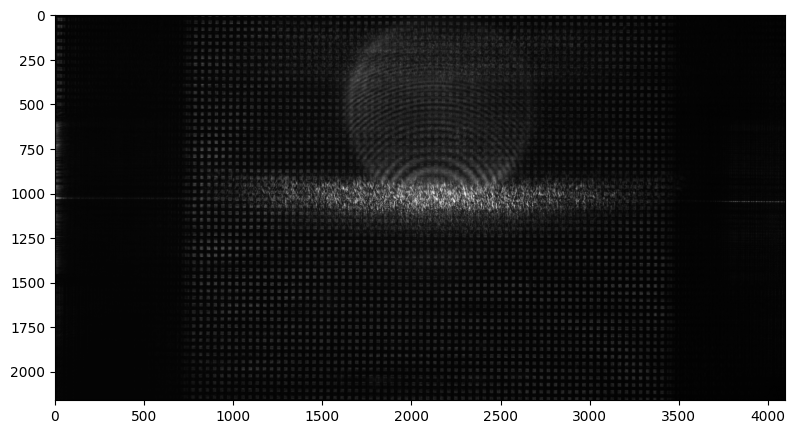

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img_cv2)
plt.show()

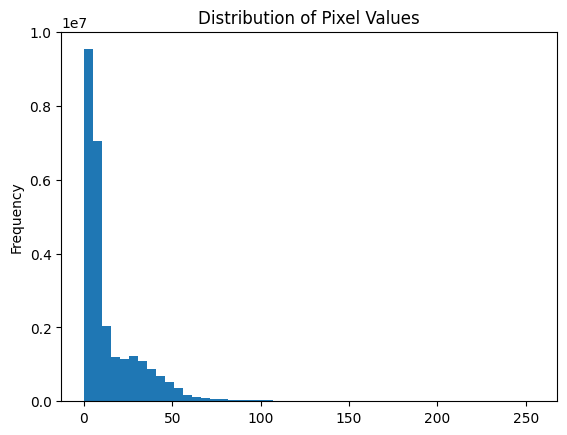

In [5]:
pd.Series(img_cv2.flatten()).plot(kind='hist', bins=50, title='Distribution of Pixel Values')
plt.show()